In [15]:
! pip install gwpy # first installing packages needed to go through the LIGO data

The following example is from: https://gwpy.github.io/docs/stable/examples/signal/gw150914/

In [3]:

t0 = 1264316116.4 #GPS time here GW200129_065458

from gwpy.timeseries import TimeSeries #importing raw data
hdata = TimeSeries.fetch_open_data('H1', 1264316100.4, 1264316132.4) # taking hanford data around the event
#Times listed after H1 are 16 seconds before and after the GPS time

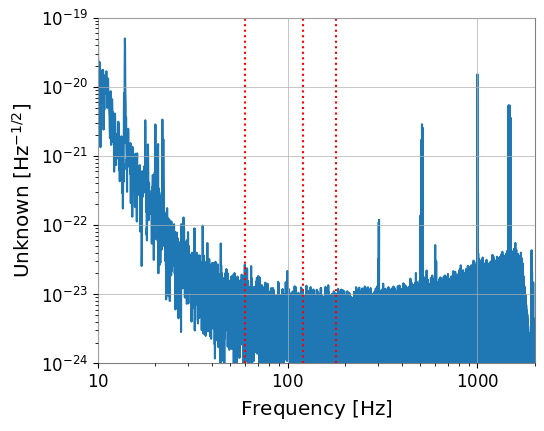

In [16]:
import matplotlib.pyplot as plt # importing matplotlib so we can plot a graph

# -- Plot ASD
fig2 = hdata.asd().plot()
plt.xlim(10,2000) # upper and lower bounds for the x axis
ymin = 1e-24
ymax = 1e-19
plt.ylim(ymin, ymax) # upper and lower bounds for the y axis
plt.vlines(60,  ymin, ymax, linestyle="dotted", color="red") # dotted lines to show where the notches will go
plt.vlines(120, ymin, ymax, linestyle="dotted", color="red")
plt.vlines(180, ymin, ymax, linestyle="dotted", color="red")

In [17]:
from gwpy.signal import filter_design # Import a way to filter out noise from the frequency we want
bp = filter_design.bandpass(50, 250, hdata.sample_rate) # frequencies below 50 and higher than 250 will be filtered out

notches = [filter_design.notch(line, hdata.sample_rate) for
           line in (60, 120, 180)] # these are peaks we can account for and will filter out separately

zpk = filter_design.concatenate_zpks(bp, *notches) #putting the two filters together

hfilt = hdata.filter(zpk, filtfilt=True) # applying the filters


In [6]:
hdata = hdata.crop(*hdata.span.contract(1)) # crop data on both ends that has been messed up by the filter
hfilt = hfilt.crop(*hfilt.span.contract(1))

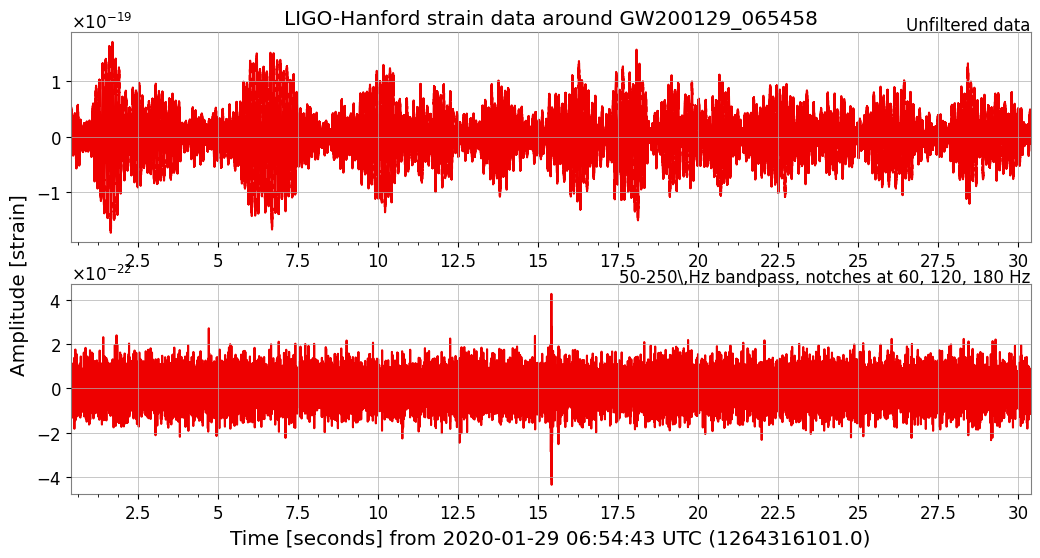

In [7]:
from gwpy.plot import Plot #import plot functions from gravitational wave python package
plot = Plot(hdata, hfilt, figsize=[12, 6], separate=True, sharex=True,
            color='gwpy:ligo-hanford') # formatting and creating the plot
ax1, ax2 = plot.axes # setting the axes of both plots equal
ax1.set_title('LIGO-Hanford strain data around GW200129_065458')
ax1.text(1.0, 1.01, 'Unfiltered data', transform=ax1.transAxes, ha='right')
ax1.set_ylabel('Amplitude [strain]', y=-0.2)
ax2.set_ylabel('')#titling the axes
ax2.text(1.0, 1.01, r'50-250\,Hz bandpass, notches at 60, 120, 180 Hz',
         transform=ax2.transAxes, ha='right')
plot.show() #showing plot

Now using functions in matlibplot to plot without using gwpy

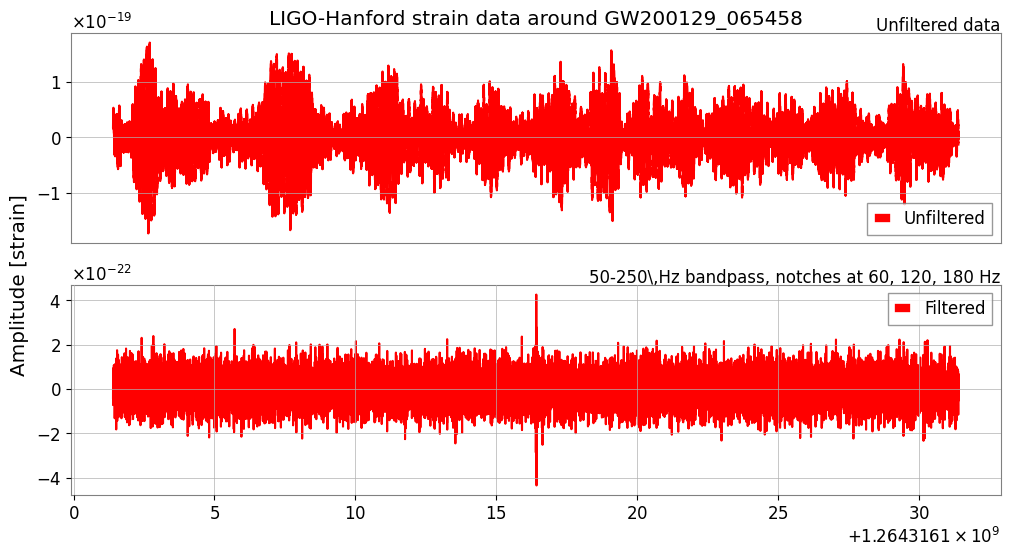

In [8]:
#Repeat process using matplotlib functions intead of gwpy
plt.figure(figsize=[12, 6]) #sizing the plot
ax1 = plt.subplot(2, 1, 1)
ax1.plot(hdata.times.value, hdata.value, color="red", label="Unfiltered")
plt.legend() # formatting the plot
ax1.set_title('LIGO-Hanford strain data around GW200129_065458')
ax1.text(1.0, 1.01, 'Unfiltered data', transform=ax1.transAxes, ha='right')
ax1.xaxis.set_visible(False) # labelling the axes
ax2 = plt.subplot(2, 1, 2)
ax2.plot(hfilt.times.value, hfilt.value, color="red", label="Filtered")
ax1.set_ylabel('Amplitude [strain]', y=-0.2)
ax2.set_ylabel('')
ax2.text(1.0, 1.01, r'50-250\,Hz bandpass, notches at 60, 120, 180 Hz',
         transform=ax2.transAxes, ha='right')
plt.legend()#show the plot legend


In [9]:
hdata.value #showing the array of H1 data values

array([ 1.83592281e-20,  2.83546086e-20,  2.26853843e-20, ...,
       -5.40481737e-21, -8.51400141e-21, -1.28703668e-20])

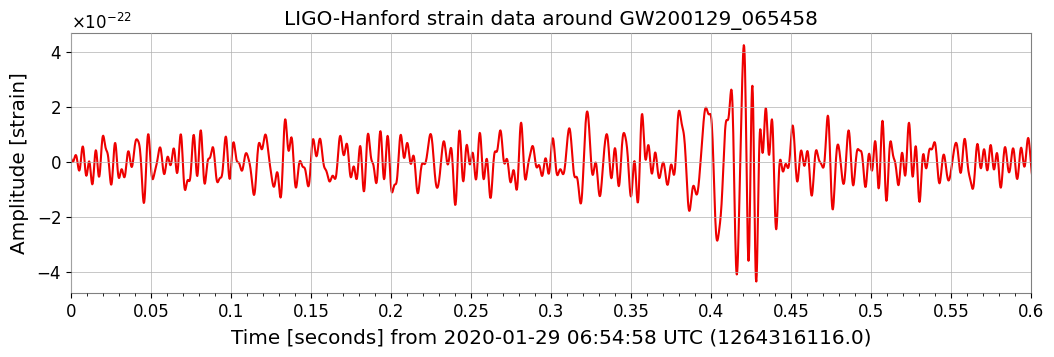

In [10]:
import matplotlib.pyplot as plt # importing the package that lets us plot

plot = hfilt.plot(color='gwpy:ligo-hanford')
ax = plot.gca()
ax.set_title('LIGO-Hanford strain data around GW200129_065458') # titling the set
ax.set_ylabel('Amplitude [strain]') # titling the y axis
ax.set_xlim(1264316116,1264316116.6) #limiting the x axis
ax.set_xscale('seconds', epoch=1264316116) #scaling the x axis
plot.show() #showing the data plot

x_val = plt.gca().lines[0].get_xdata()
y_val = plt.gca().lines[0].get_ydata()# stores the x and y values for later


In [30]:
#repeating the process with the Livingston data
ldata = TimeSeries.fetch_open_data('L1', 1264316100.4, 1264316132.4)
lfilt = ldata.filter(zpk, filtfilt=True)

In [35]:
lfilt.shift('0ms') #shifting doesn't help
lfilt *= 1 #flipping the data since the ligo detectors are not angled the same way

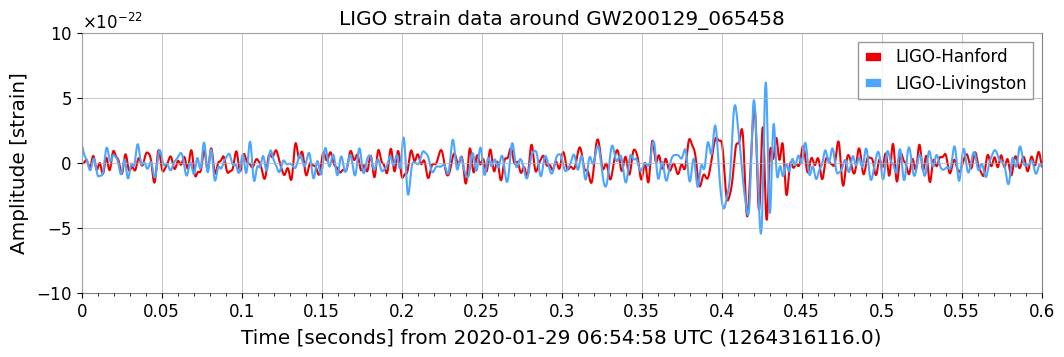

In [36]:
plot = Plot(figsize=[12, 4]) #sizing the plot
ax = plot.gca()
ax.plot(hfilt, label='LIGO-Hanford', color='gwpy:ligo-hanford')
ax.plot(lfilt, label='LIGO-Livingston', color='gwpy:ligo-livingston') #putting the hanford and livingston data into the plot
ax.set_title('LIGO strain data around GW200129_065458') #titling the plot
ax.set_xlim(1264316116, 1264316116.6) #x axis limits
ax.set_xscale('seconds', epoch=1264316116) #epoch =t0
ax.set_ylabel('Amplitude [strain]') # y axis label
ax.set_ylim(-1e-21, 1e-21) #y axis limits
ax.legend()
plot.show() # show the plot

https://colab.research.google.com/github/losc-tutorial/quickview/blob/master/index.ipynb
Also from: https://gwpy.github.io/docs/stable/examples/signal/qscan/

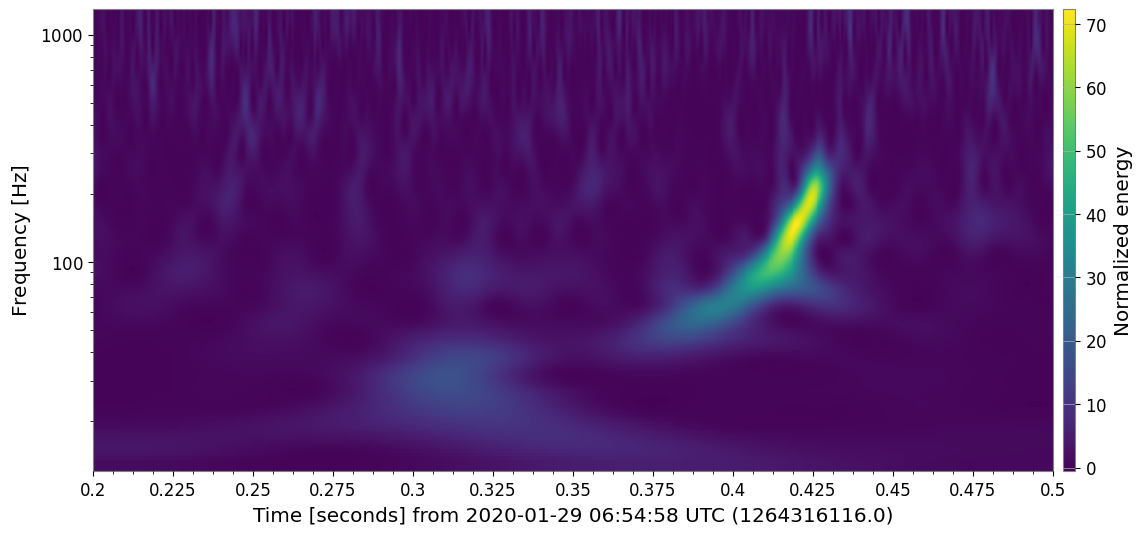

In [37]:
dt = 0.2  #-- Set width of q-transform plot, in seconds
hq = hfilt.q_transform(outseg=(t0-dt, t0+0.1))
fig4 = hq.plot()
ax = fig4.gca()
fig4.colorbar(label="Normalized energy") # show what colors represent what normalized energies
ax.grid(False)
ax.set_yscale('log') #y axis scale is in log

In [38]:
from scipy.io.wavfile import write # import part of a package that lets us listen to the data
import numpy as np #importing numpy for plots

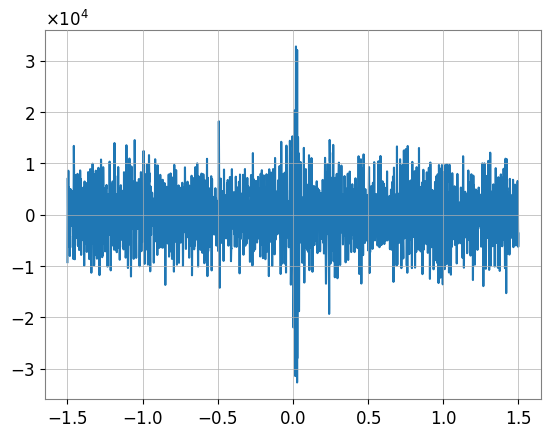

In [39]:
amplitude = np.iinfo(np.int16).max #Putting a max limit on the amplitude

ind = np.where((x_val < (t0+1.5)) & (x_val > (t0-1.5))) #cropping the x values
y = y_val[ind] #only having y values according to the limited x values
# y = y**3
y = y / np.max(y)
plt.plot(x_val[ind] - t0, (np.array(y) * amplitude).astype(np.int16)) #plotting the data

In [40]:
fs = int(1 / np.median(np.diff(np.array(x_val[ind] - t0))))
print("fs = ", fs) #print out frequencies
write("example.wav", fs, (np.array(y) * amplitude).astype(np.int16))

fs =  4096


In [41]:
from google.colab import files #import files from google colab
files.download("example.wav") #showing what the data sounds like

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>